<a href="https://colab.research.google.com/github/pboric/Project-4/blob/main/Mental_Health_in_the_Tech_Industry_SQL_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mental Health in the Tech Industry

>[Mental Health in the Tech Industry](#scrollTo=stQO7iz_Ak8W)

>>[About Dataset](#scrollTo=AtuDHP3kAs3t)

>[Importing the libraries and loading the database](#scrollTo=Shk7tR01N-WJ)

>[Executing the query and load the result into a dataframe](#scrollTo=1Ii6oWgkqCq0)

>[Number of surveyed users](#scrollTo=rLNpk3kxo5HX)

>[Survey questions](#scrollTo=Q3IPNvC7nmju)

>>[Cleaning the Age values and running a basic statistic analysis](#scrollTo=pVN_9zGtcPDb)

>>[Cleaning the gender values and running basic statistics](#scrollTo=WqOCQwq3huFp)

>>[Cleaning the mental family history values and running basic statistics](#scrollTo=HoLlPnhjni8O)

>>[Statistics: Have you ever sought treatment for a mental health disorder from a mental health professional?](#scrollTo=PIPrWi54JrMY)

>>[Cleaning and statistics: Does your employer provide mental health benefits as part of healthcare coverage?](#scrollTo=yFN_uNWdNmxN)

>>[Cleaning and statistics: Would you bring up a mental health issue with a potential employer in an interview?](#scrollTo=N6wAtM_wQ3sC)

>>[Cleaning and statistics: Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?](#scrollTo=UMF-F1_sSNlM)

>>[Cleaning and statistics: Does your employer offer resources to learn more about mental health disorders and options for seeking help?](#scrollTo=XnP-TZEMSrua)

>>[Cleaning and statistics: Would you feel comfortable discussing a mental health issue with your coworkers?](#scrollTo=toB0J0zWTqUk)

>>[Cleaning and statistics: Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?](#scrollTo=SvboiJLbUSbN)

>>[Cleaning and statistics: Have your previous employers provided mental health benefits?](#scrollTo=OJ20U83bUwil)

>>[Cleaning and statistics: Would you have been willing to discuss your mental health with your direct supervisor(s)?](#scrollTo=1lRNZUsOV0nT)

>>[Statistics: How willing would you be to share with friends and family that you have a mental illness?](#scrollTo=LxFDZTplY94e)

>>[Cleaning and statistics: Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?](#scrollTo=pcrWrlZ9htlG)

>>[Cleaning and statistics: Have you had a mental health disorder in the past?](#scrollTo=CssQuZ9aiKrQ)

>>[Statistics: Do you currently have a mental health disorder?](#scrollTo=bCMrKDQ_kbrF)

>>[Cleaning and statistics: Do you believe your productivity is ever affected by a mental health issue?](#scrollTo=m4jd3ZSSk9PQ)

>[Distribution of Mental Illness by Gender](#scrollTo=Iuz-_6c_Lxkr)

>[Survey Participation by Country](#scrollTo=YDOAeYuhix6U)

>[Corporate Employment and Mental Health](#scrollTo=Cgskt463oF1p)

>>>[Correlation Between Enterprise Employment and Mental Health Diagnoses](#scrollTo=7GBZvCyL7At4)

>[Conclusion](#scrollTo=czOkHInsK6MB)

>[Suggestions on the improvement of the analysis](#scrollTo=h6n31yRCMXi-)



## About Dataset

**Dataset Information**
This data is from Open Source Mental Illness (OSMI) using survey data from years 2014, 2016, 2017, 2018 and 2019. Each survey measures and attitudes towards mental health and frequency of mental health disorders in the tech workplace.

The raw data was processed using Python, SQL and Excel for cleaning and manipulation.

Steps involved in cleaning were:

- Similar questions were group together
- Values for answers were made consistent (ie 1 == 1.0)
- Fixing spelling errors

**Content**
The SQLite database contains 3 tables. Survey, Question, and Answer.

Survey (PRIMARY KEY INT SurveyID, TEXT Description)
Question (PRIMARY KEY QuestionID, TEXT QuestionText)
Answer (PRIMARY/FOREIGN KEY SurveyID, PRIMARY KEY UserID, PRIMARY/FOREIGN KEY QuestionID, TEXT AnswerText)

SuveyID are simply survey year ie 2014, 2016, 2017, 2018, 2019.
The same question can be used for multiple surveys
Answer table is a composite table with multiple primary keys. SurveyID and QuestionID are FOREIGN KEYS.
Some questions can contain multiple answers, thus the same user can appear more than once for that questionid.

**Common SQL queries**
**query text information for Questionid**
SELECT * FROM Question where QuestionID = 13;

**query all answers for specified Questionid**
SELECT AnswerText FROM Answer where QuestionID = 13;

**query distribution of answer given questionid**
SELECT AnswerText, COUNT(AnswerText) from Answer where QuestionID = 13 group by AnswerText;

**query distribution of answer given questionid and survey year**
SELECT AnswerText, COUNT(AnswerText) from Answer where QuestionID = 1 and surveyid = 2016 group by AnswerText;

**query number of participants for each survey**
SELECT surveyid, COUNT(DISTINCT(userid)) FROM answer GROUP BY surveyid;

**Acknowledgements**
The original data set can be found Open Source Mental Illness (OSMI) and can be downloaded and viewed [here](https://osmihelp.org/research).

# Importing the libraries and loading the database

In [1]:
import pandas as pd
from pandas.io import sql
import sqlite3
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from google.colab import data_table

# Executing the query and load the result into a dataframe

In [2]:
# Create a connection to database
conn = sqlite3.connect('/content/mental_health.sqlite')

# Write the SQL query
query = """
SELECT Answer.SurveyID,
       Answer.UserID,
       Answer.QuestionID,
       Answer.AnswerText,
       Question.QuestionText,
       Survey.Description
FROM Answer
JOIN Question ON Answer.QuestionID = Question.QuestionID
JOIN Survey ON Answer.SurveyID = Survey.SurveyID
"""

# Execute the query and load the result into a dataframe
df = pd.read_sql_query(query, conn)

data_table.enable_dataframe_formatter()

df.head(20000)

SurveyID  UserID  QuestionID AnswerText  \
0          2014       1           1         37   
1          2014       2           1         44   
2          2014       3           1         32   
3          2014       4           1         31   
4          2014       5           1         31   
...         ...     ...         ...        ...   
19995      2014    1096          93         No   
19996      2014    1097          93        Yes   
19997      2014    1098          93         No   
19998      2014    1099          93         No   
19999      2014    1100          93         No   

                                            questiontext  \
0                                      What is your age?   
1                                      What is your age?   
2                                      What is your age?   
3                                      What is your age?   
4                                      What is your age?   
...                                                  ...   
19995  Do you work remotely (outside of an office) at...   
19996  Do you work remotely (outside of an office) at...   
19997  Do you work remotely (outside of an office) at...   
19998  Do you work remotely (outside of an office) at...   
19999  Do you work remotely (outside of an office) at...   

                         Description  
0      mental health survey for 2014  
1      mental health survey for 2014  
2      mental health survey for 2014  
3      mental health survey for 2014  
4      mental health survey for 2014  
...                              ...  
19995  mental health survey for 2014  
19996  mental health survey for 2014  
19997  mental health survey for 2014  
19998  mental health survey for 2014  
19999  mental health survey for 2014  

[20000 rows x 6 columns]

By filtering the values in the table we can see the data is unclean e.g. improbable ages.

# Number of surveyed users

Total count of distinct user IDs: 4218


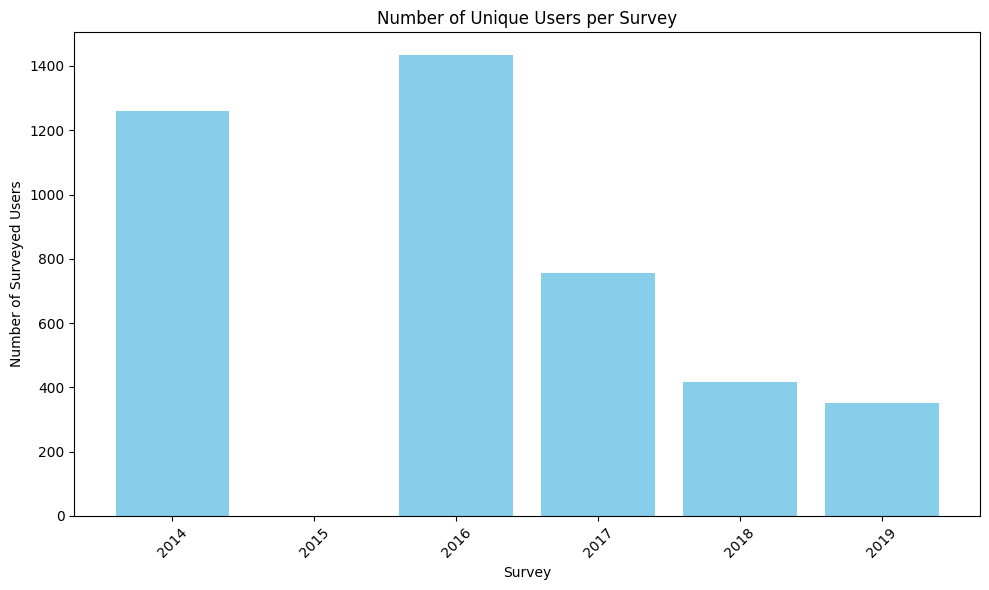

In [3]:
cur = conn.cursor()

# Query to count the total number of unique users
cur.execute(
    "SELECT COUNT(DISTINCT userid) FROM Answer"
)
total_unique_users = cur.fetchone()[0]
print("Total count of distinct user IDs:", total_unique_users)

# Query to count the number of unique users per SurveyID
query = """
SELECT SurveyID, COUNT(DISTINCT userid)
FROM Answer
GROUP BY SurveyID
"""
cur.execute(query)
unique_users_per_survey = cur.fetchall()

# Prepare data for plotting
survey_ids = [survey[0] for survey in unique_users_per_survey]
unique_users_counts = [survey[1] for survey in unique_users_per_survey]

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(survey_ids, unique_users_counts, color='skyblue')
plt.xlabel('Survey')
plt.ylabel('Number of Surveyed Users')
plt.title('Number of Unique Users per Survey')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Close the cursor
cur.close()

We can see that the number of users taking surveys is decreasing each year.

# Survey questions

In [4]:
unique_questions = df[['QuestionID', 'questiontext']].drop_duplicates()
unique_questions.sort_values(by='QuestionID', inplace=True)

for _, row in unique_questions.iterrows():
    question_id, question_text = row['QuestionID'], row['questiontext']
    print(f"{question_id}: {question_text}")

1: What is your age?
2: What is your gender?
3: What country do you live in?
4: If you live in the United States, which state or territory do you live in?
5: Are you self-employed?
6: Do you have a family history of mental illness?
7: Have you ever sought treatment for a mental health disorder from a mental health professional?
8: How many employees does your company or organization have?
9: Is your employer primarily a tech company/organization?
10: Does your employer provide mental health benefits as part of healthcare coverage?
11: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
12: Would you bring up a mental health issue with a potential employer in an interview?
13: Is your primary role within your company related to tech/IT?
14: Do you know the options for mental health care available under your employer-provided health coverage?
15: Has your employer ever formally discussed mental hea

## Cleaning the Age values and running a basic statistic analysis

Mean: 33.80
Median: 33.00
Standard Deviation: 7.94
25th Percentile (Q1): 28.00
75th Percentile (Q3): 38.00


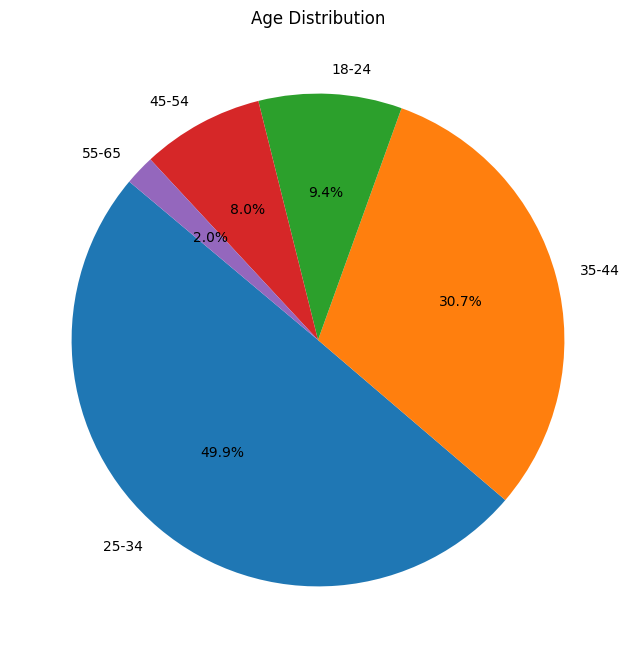

In [5]:
query = """
SELECT AnswerText
FROM Answer
WHERE QuestionID = 1
AND CAST(AnswerText AS FLOAT) >= 18
AND CAST(AnswerText AS FLOAT) <= 65;
"""

q1 = pd.read_sql_query(query, conn)

# Convert AnswerText to numeric
q1['AnswerText'] = pd.to_numeric(q1['AnswerText'], errors='coerce')

# Calculate mean and standard deviation
mean_val = q1['AnswerText'].mean()
std_val = q1['AnswerText'].std()


cleaned_q1 = q1.dropna()

# Recalculate statistics on cleaned data
mean_val = cleaned_q1['AnswerText'].mean()
median_val = cleaned_q1['AnswerText'].median()
std_val = cleaned_q1['AnswerText'].std()
q1_25th_percentile = cleaned_q1['AnswerText'].quantile(0.25)
q1_75th_percentile = cleaned_q1['AnswerText'].quantile(0.75)

results = (
    f"Mean: {mean_val:.2f}\n"
    f"Median: {median_val:.2f}\n"
    f"Standard Deviation: {std_val:.2f}\n"
    f"25th Percentile (Q1): {q1_25th_percentile:.2f}\n"
    f"75th Percentile (Q3): {q1_75th_percentile:.2f}"
)
print(results)

# Create age bins and labels for the pie chart
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-24', '25-34', '35-44', '45-54', '55-65']
cleaned_q1['AgeGroup'] = pd.cut(cleaned_q1['AnswerText'],
                                 bins=bins,
                                 labels=labels,
                                 right=False)

# Count the number of occurrences in each bin
age_group_counts = cleaned_q1['AgeGroup'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(age_group_counts,
        labels=age_group_counts.index,
        autopct='%1.1f%%',
        startangle=140)
plt.title('Age Distribution')
plt.show()



Out of all the age groups most participants are between 25-34 years old.

## Cleaning the gender values and running basic statistics

In [41]:
query = (
    "SELECT AnswerText "
    "FROM Answer "
    "WHERE QuestionID = 2 "
    "AND AnswerText IS NOT NULL "
    "AND AnswerText <> '';"
)

q2 = pd.read_sql_query(query, conn)

# Impute non-"Male" or non-"Female" values with "Other"
q2['AnswerText'] = q2['AnswerText'].apply(
    lambda x: 'Other' if x not in ['Male', 'Female'] else x
)

# Calculate counts and percentages
total_responses = len(q2)
male_count = q2['AnswerText'].eq('Male').sum()
female_count = q2['AnswerText'].eq('Female').sum()
other_count = q2['AnswerText'].eq('Other').sum()
male_percentage = (male_count / total_responses) * 100
female_percentage = (female_count / total_responses) * 100
other_percentage = (other_count / total_responses) * 100

# Consolidate print statements
results = (
    f"Total Responses: {total_responses}\n"
    f"Male: {male_count}\n"
    f"Female: {female_count}\n"
    f"Other: {other_count}")

# Plotting setup
categories = ['Male', 'Female', 'Other']
counts = [male_count, female_count, other_count]
percentages = [male_percentage, female_percentage, other_percentage]

# Create bar chart with annotations
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, counts, color=['blue', 'orange', 'green'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Annotate bars with percentage values
for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    plt.annotate(
        f'{percentage:.2f}%',
        (bar.get_x() + bar.get_width() / 2, yval),
        va='bottom', ha='center'
    )

plt.tight_layout()
plt.show()
print(results)

Total Responses: 4218
Male: 2830
Female: 914
Other: 474


Most of the participants are male.

## Cleaning the mental family history values and running basic statistics

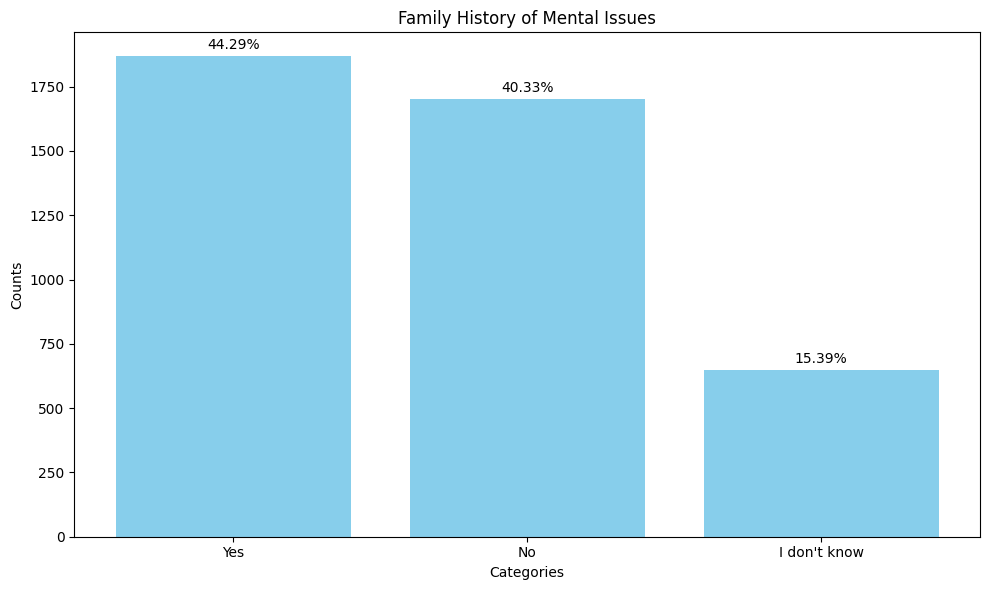

Category Counts:
| AnswerText   |   Count |
|:-------------|--------:|
| Yes          |    1868 |
| No           |    1701 |
| I don't know |     649 |


In [40]:
query = (
    "SELECT AnswerText "
    "FROM Answer "
    "WHERE QuestionID = 6 "
    "AND AnswerText IS NOT NULL;"
)

q6 = pd.read_sql_query(query, conn)

# Calculate the count and percentage of each answer category
category_counts = q6['AnswerText'].value_counts()
category_percentages = (q6['AnswerText']
                        .value_counts(normalize=True) * 100)

# Format the results into a neat table
formatted_counts = category_counts.reset_index()
formatted_counts.columns = ['AnswerText', 'Count']
formatted_percentages = category_percentages.reset_index()
formatted_percentages.columns = ['AnswerText', 'Percentage']
formatted_percentages['Percentage'] = (
    formatted_percentages['Percentage'].apply(lambda x: f"{x:.2f}%")
)

plt.figure(figsize=(10, 6))
bars = plt.bar(formatted_counts['AnswerText'], formatted_counts['Count'],
               color='skyblue')

plt.title('Family History of Mental Issues')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation=0)

# Annotate with the percentage values
for bar, percentage in zip(bars, formatted_percentages['Percentage']):
    height = bar.get_height()
    plt.annotate(percentage,
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("Category Counts:")
print(formatted_counts.to_markdown(index=False))

Close to half of the participants have a mental health issue in the family history.

## Statistics: Have you ever sought treatment for a mental health disorder from a mental health professional?

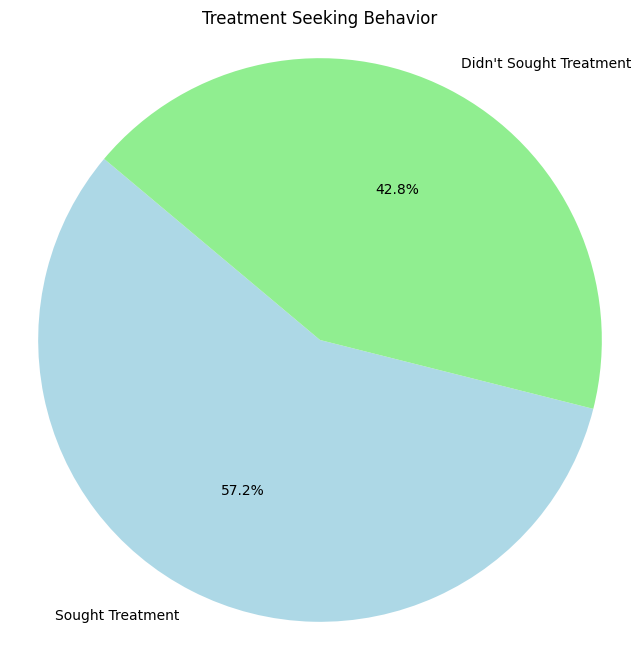

In [8]:
query = """
SELECT AnswerText
FROM Answer
WHERE QuestionID = 7;
"""

q7 = pd.read_sql_query(query, conn)

q7['AnswerText'] = pd.to_numeric(q7['AnswerText'])

# Calculate the percentage of users who have sought treatment
percentage_sought_treatment = q7['AnswerText'].mean() * 100
percentage_not_sought_treatment = 100 - percentage_sought_treatment

labels = ['Sought Treatment', "Didn't Sought Treatment"]
sizes = [percentage_sought_treatment, percentage_not_sought_treatment]
colors = ['lightblue', 'lightgreen']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=140)
plt.title('Treatment Seeking Behavior')
plt.axis('equal')
plt.show()

More than half of the participants sought treatment for their mental health problem.

## Cleaning and statistics: Does your employer provide mental health benefits as part of healthcare coverage?

In [9]:
query = """
SELECT AnswerText
FROM Answer
WHERE QuestionID = 10
AND AnswerText IN ('Yes', 'No', "Don't know");
"""

q10 = pd.read_sql_query(query, conn)

# Count the frequency of each answer
statistics = q10['AnswerText'].value_counts()

# Calculate the percentage of each answer
percentage = q10['AnswerText'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
statistics.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral'])

plt.title('Does your employer provide mental health'
          'benefits as part of healthcare coverage?')
plt.xlabel('Answer')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

for i, value in enumerate(statistics):
    plt.annotate(f'{percentage[i]:.2f}%',
                 xy=(i, value),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\nCounts of each value:")
print(statistics.to_markdown())


Counts of each value:
| AnswerText   |   count |
|:-------------|--------:|
| Yes          |    1744 |
| No           |     756 |
| Don't know   |     408 |


More than half of the participants had been provided with mental health benefits from their employer.

## Cleaning and statistics: Would you bring up a mental health issue with a potential employer in an interview?


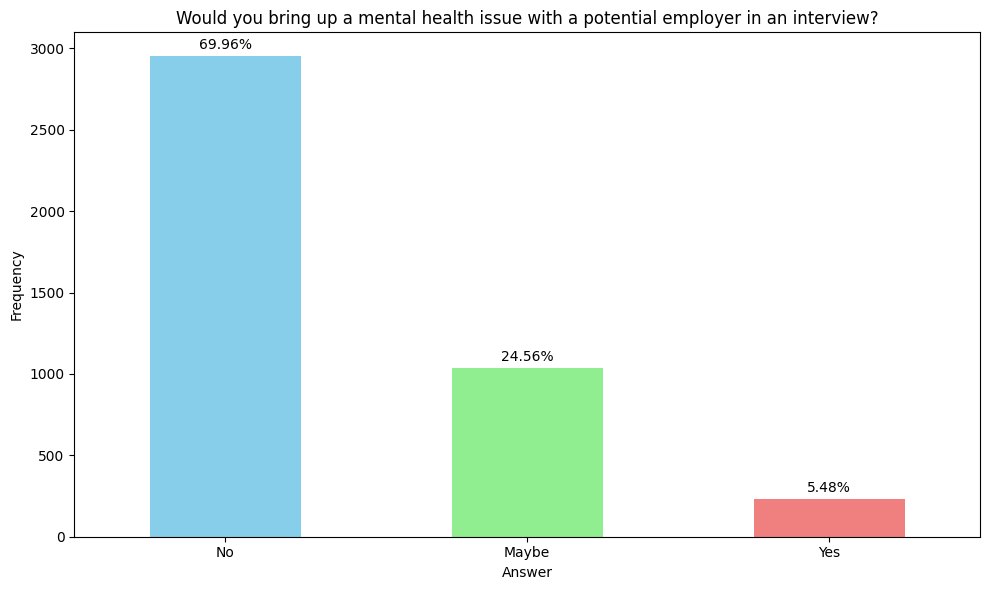

| AnswerText   |   Frequency |
|:-------------|------------:|
| No           |        2951 |
| Maybe        |        1036 |
| Yes          |         231 |


In [10]:
query = """
SELECT AnswerText
FROM Answer
WHERE QuestionID = 12
AND AnswerText IN ('Yes', 'No', 'Maybe');
"""

q12 = pd.read_sql_query(query, conn)

statistics = q12['AnswerText'].value_counts()

percentage = q12['AnswerText'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
statistics.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral'])

plt.title('Would you bring up a mental health issue'
          'with a potential employer in an interview?')
plt.xlabel('Answer')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

for i, value in enumerate(statistics):
    plt.annotate(f'{percentage[i]:.2f}%',
                 xy=(i, value),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()

formatted_statistics = statistics.reset_index()
formatted_statistics.columns = ['AnswerText', 'Frequency']
print(formatted_statistics.to_markdown(index=False))

Nearly 70% of participants wouldn't bring up a mental health issue with a potentional employer.

## Cleaning and statistics: Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?

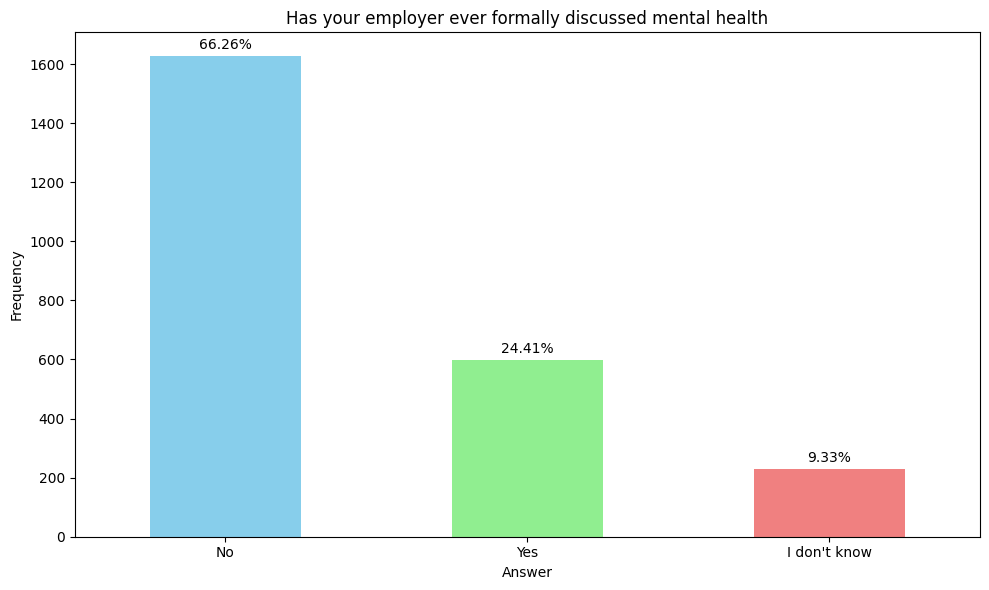

| AnswerText   |   Frequency |
|:-------------|------------:|
| No           |        1626 |
| Yes          |         599 |
| I don't know |         229 |


In [11]:
query = """
SELECT AnswerText
FROM Answer
WHERE QuestionID = 15
AND AnswerText IN ('Yes', 'No', "I don't know");
"""

q15 = pd.read_sql_query(query, conn)

statistics = q15['AnswerText'].value_counts()

percentage = q15['AnswerText'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
statistics.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral'])

plt.title('Has your employer ever formally discussed mental health')
plt.xlabel('Answer')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

for i, value in enumerate(statistics):
    plt.annotate(f'{percentage[i]:.2f}%',
                 xy=(i, value),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()

formatted_statistics = statistics.reset_index()
formatted_statistics.columns = ['AnswerText', 'Frequency']
print(formatted_statistics.to_markdown(index=False))

66% of participants do not formally discuss mental health with their employer.

## Cleaning and statistics: Does your employer offer resources to learn more about mental health disorders and options for seeking help?

In [12]:
query = """
SELECT AnswerText
FROM Answer
WHERE QuestionID = 16
AND AnswerText IN ('Yes', 'No', "I don't know");
"""

q16 = pd.read_sql_query(query, conn)

statistics = q16['AnswerText'].value_counts()

percentage = q16['AnswerText'].value_counts(normalize=True) * 100

labels = statistics.index
sizes = statistics.values
colors = ['skyblue', 'lightgreen', 'lightcoral']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=140, labeldistance=1.03)
plt.title('Does your employer offer resources'
          'to learn more about mental health')
plt.xticks()
plt.axis('equal')
plt.show()

formatted_statistics = statistics.reset_index()
formatted_statistics.columns = ['AnswerText', 'Frequency']
print(formatted_statistics.to_markdown(index=False))

| AnswerText   |   Frequency |
|:-------------|------------:|
| No           |        1084 |
| Yes          |         702 |
| I don't know |         668 |


Close to half of participants aren't offered any resources to learn more about mental health.

## Cleaning and statistics: Would you feel comfortable discussing a mental health issue with your coworkers?

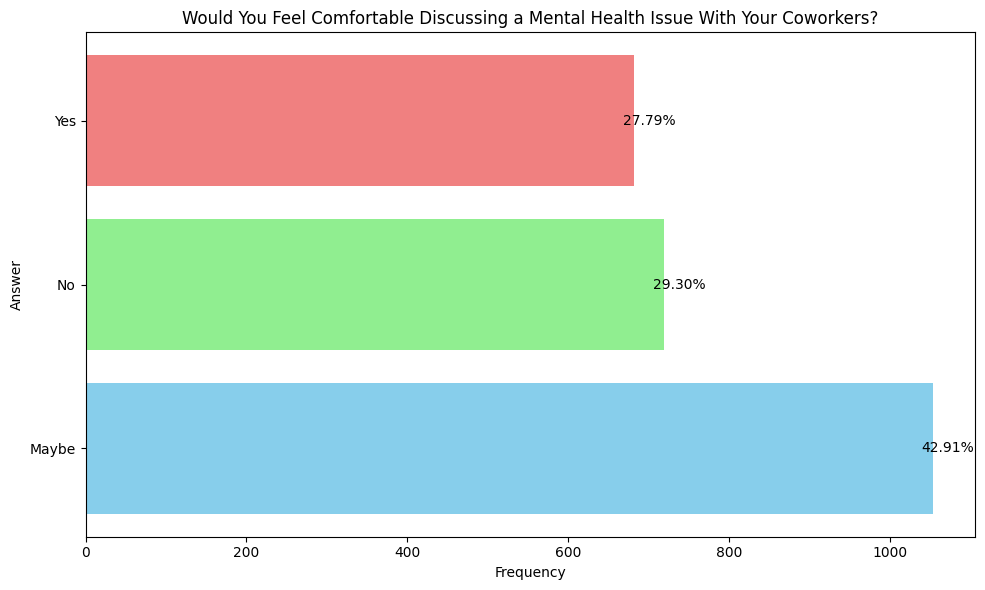

| AnswerText   |   Frequency |
|:-------------|------------:|
| Maybe        |        1053 |
| No           |         719 |
| Yes          |         682 |


In [44]:
query = """
SELECT AnswerText
FROM Answer
WHERE QuestionID = 18
AND AnswerText IN ('Yes', 'No', 'Maybe');
"""

q18 = pd.read_sql_query(query, conn)

statistics = q18['AnswerText'].value_counts()

percentage = q18['AnswerText'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
bars = plt.barh(statistics.index, statistics.values,
                color=['skyblue', 'lightgreen', 'lightcoral'])

plt.title('Would You Feel Comfortable Discussing'
          ' a Mental Health Issue With Your Coworkers?')
plt.xlabel('Frequency')
plt.ylabel('Answer')

for bar, pct in zip(bars, percentage):
    plt.annotate(f'{pct:.2f}%',
                 xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                 xytext=(-8, 0),  # 5 points horizontal offset
                 textcoords="offset points",
                 ha='left', va='center')

plt.tight_layout()
plt.show()

formatted_statistics = statistics.reset_index()
formatted_statistics.columns = ['AnswerText', 'Frequency']
print(formatted_statistics.to_markdown(index=False))

It is evident that discussing mental health with coworkers is not a usual topic.

## Cleaning and statistics: Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?

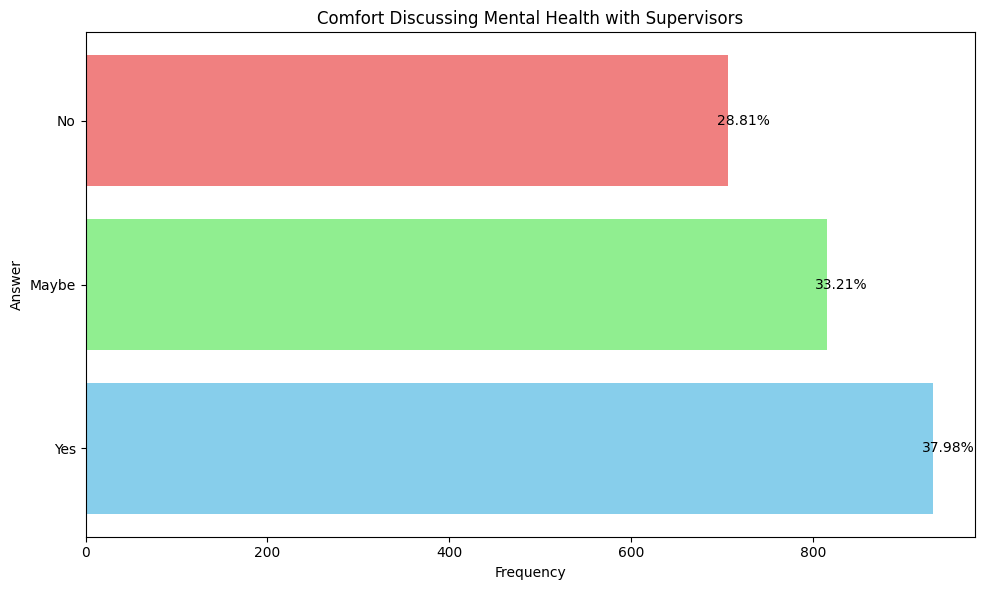

| AnswerText   |   Frequency |
|:-------------|------------:|
| Yes          |         932 |
| Maybe        |         815 |
| No           |         707 |


In [39]:
query = """
SELECT AnswerText
FROM Answer
WHERE QuestionID = 19
AND AnswerText IN ('Yes', 'No', 'Maybe');
"""

q19 = pd.read_sql_query(query, conn)

statistics = q19['AnswerText'].value_counts()

percentage = (
    q19['AnswerText'].value_counts(normalize=True) * 100
).round(2)

plt.figure(figsize=(10, 6))
bars = plt.barh(
    statistics.index, statistics.values,
    color=['skyblue', 'lightgreen', 'lightcoral']
)

plt.title(
    'Comfort Discussing Mental Health with Supervisors'
)
plt.xlabel('Frequency')
plt.ylabel('Answer')

for bar, pct in zip(bars, percentage):
    plt.annotate(
        f'{pct:.2f}%',
        xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
        xytext=(-8, 0),  # Horizontal offset
        textcoords="offset points",
        ha='left', va='center'
    )

plt.tight_layout()
plt.show()

formatted_statistics = statistics.reset_index()
formatted_statistics.columns = ['AnswerText', 'Frequency']
print(formatted_statistics.to_markdown(index=False))

Nearly 38% of participants are comfortable discussing mental health with supervisors.

## Cleaning and statistics: Have your previous employers provided mental health benefits?

In [38]:
query = """
SELECT AnswerText
FROM Answer
WHERE QuestionID = 23
AND AnswerText IN (
    'Yes, they all did', 'No, none did', 'Some did', "I don't know"
);
"""

q23 = pd.read_sql_query(query, conn)

statistics = q23['AnswerText'].value_counts()

percentage = (
    q23['AnswerText'].value_counts(normalize=True) * 100
).round(2)

plt.figure(figsize=(10, 6))
bars = plt.barh(
    statistics.index, statistics.values,
    color=['skyblue', 'lightgreen', 'lightcoral', 'lightyellow']
)


plt.title('Mental Health Benefits Provided by Previous Employers')
plt.xlabel('Frequency')
plt.ylabel('Answer')

for bar, pct in zip(bars, percentage):
    plt.annotate(
        f'{pct:.2f}%',
        xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
        xytext=(-8, 0),  # Horizontal offset
        textcoords="offset points",
        ha='left', va='center'
    )

plt.tight_layout()
plt.show()

formatted_statistics = statistics.reset_index()
formatted_statistics.columns = ['AnswerText', 'Frequency']
print(formatted_statistics.to_markdown(index=False))

| AnswerText        |   Frequency |
|:------------------|------------:|
| Some did          |         852 |
| No, none did      |         700 |
| I don't know      |         619 |
| Yes, they all did |         419 |


It is evident that previous employers did not provide with mental health benefits.

## Cleaning and statistics: Would you have been willing to discuss your mental health with your direct supervisor(s)?

In [36]:
query = """
SELECT
    CASE
        WHEN AnswerText IN (
            'Yes, all of my previous supervisors',
            'Yes, at all of my previous employers'
        ) THEN 'Yes'
        WHEN AnswerText IN (
            'No, at none of my previous employers',
            'No, none of my previous supervisors'
        ) THEN 'No'
        WHEN AnswerText IN (
            'Some of my previous employers',
            'Some of my previous supervisors'
        ) THEN 'Some'
        ELSE 'I don''t know'
    END AS MappedAnswer
FROM Answer
WHERE QuestionID = 28;
"""

q28 = pd.read_sql_query(query, conn)

statistics = q28['MappedAnswer'].value_counts()

percentage = (
    q28['MappedAnswer'].value_counts(normalize=True) * 100
).round(2)

plt.figure(figsize=(10, 6))
bars = plt.barh(
    statistics.index, statistics.values,
    color=['skyblue', 'lightgreen', 'lightcoral', 'lightyellow']
)

plt.title(
    'Willingness to Discuss Mental Health with Supervisors'
)
plt.xlabel('Frequency')
plt.ylabel('Answer')

for bar, pct in zip(bars, percentage):
    plt.annotate(
        f'{pct:.2f}%',
        xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
        xytext=(-8, 0),  # Horizontal offset
        textcoords="offset points",
        ha='left', va='center'
    )

plt.tight_layout()
plt.show()

formatted_statistics = statistics.reset_index()
formatted_statistics.columns = ['MappedAnswer', 'Frequency']
print(formatted_statistics.to_markdown(index=False))


| MappedAnswer   |   Frequency |
|:---------------|------------:|
| Some           |        1308 |
| No             |         901 |
| I don't know   |         558 |
| Yes            |         191 |


44% of the participants would only discuss mental health with some of the supervisors.

## Statistics: How willing would you be to share with friends and family that you have a mental illness?

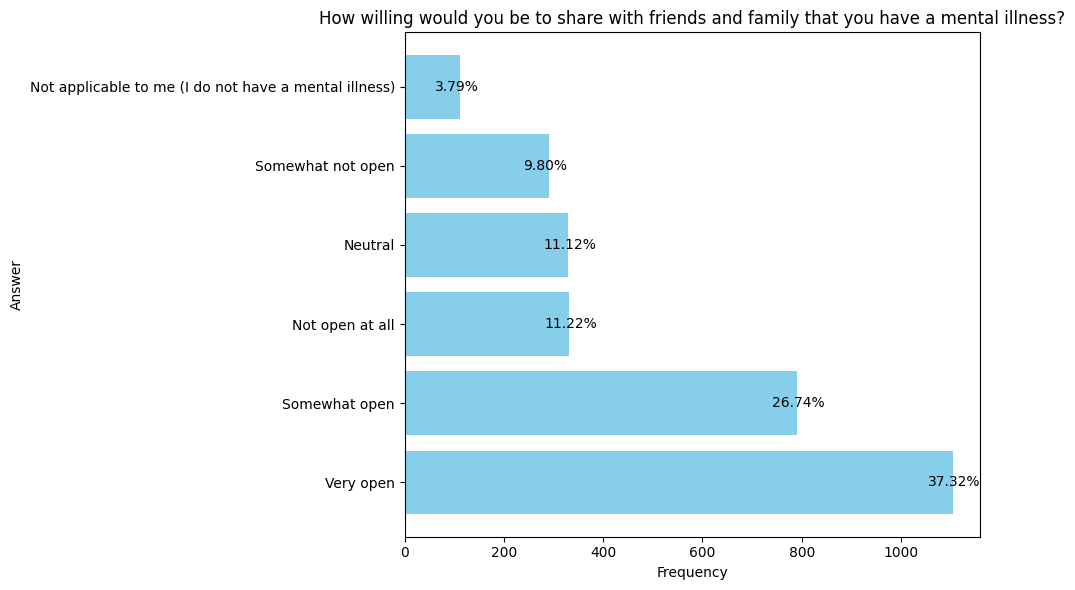

| AnswerText                                            |   Frequency |
|:------------------------------------------------------|------------:|
| Very open                                             |        1104 |
| Somewhat open                                         |         791 |
| Not open at all                                       |         332 |
| Neutral                                               |         329 |
| Somewhat not open                                     |         290 |
| Not applicable to me (I do not have a mental illness) |         112 |


In [34]:
query = """
SELECT AnswerText
FROM Answer
WHERE QuestionID = 30;
"""

q30 = pd.read_sql_query(query, conn)

statistics = q30['AnswerText'].value_counts()

percentage = q30['AnswerText'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
bars = plt.barh(statistics.index, statistics.values, color='skyblue')

plt.title('How willing would you be to share '
          'with friends and family that you have a mental illness?')
plt.xlabel('Frequency')
plt.ylabel('Answer')
plt.yticks(rotation=0)

for bar, pct in zip(bars, percentage):
    plt.annotate(f'{pct:.2f}%',
                 xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                 xytext=(-18, 0),
                 textcoords="offset points",
                 ha='left', va='center')

plt.tight_layout()
plt.show()

formatted_statistics = statistics.reset_index()
formatted_statistics.columns = ['AnswerText', 'Frequency']
print(formatted_statistics.to_markdown(index=False))

37% of participants are open to share their mental health issues with their family.

## Cleaning and statistics: Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?

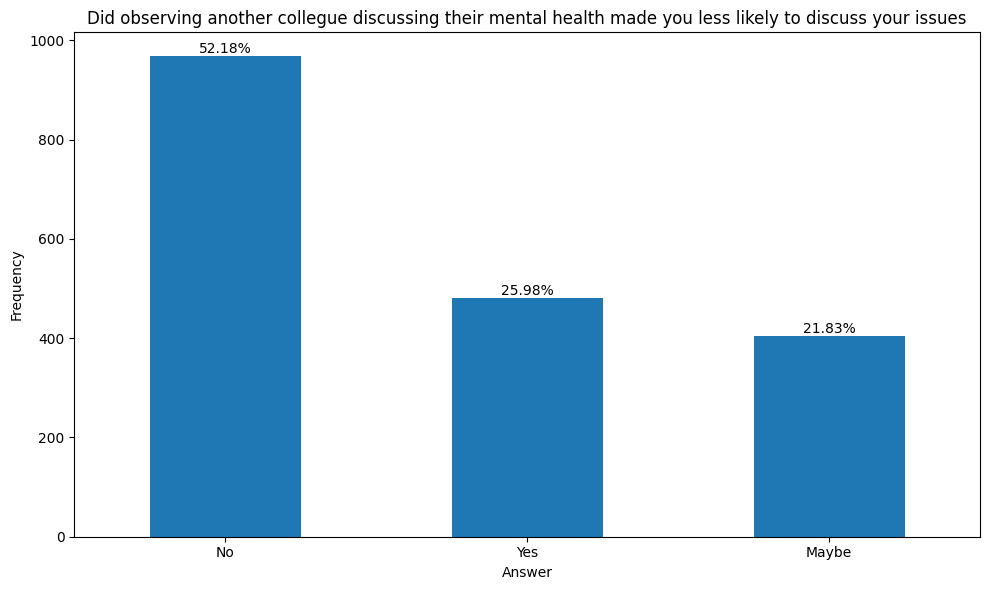

| Answer   |   Frequency |
|:---------|------------:|
| No       |         968 |
| Yes      |         482 |
| Maybe    |         405 |


In [43]:
query = """
SELECT AnswerText
FROM Answer
WHERE QuestionID = 31 AND AnswerText IN ('Yes', 'No', 'Maybe');
"""

q31 = pd.read_sql_query(query, conn)

statistics = q31['AnswerText'].value_counts()

percentage = (
    q31['AnswerText'].value_counts(normalize=True) * 100
).round(2)

formatted_statistics = pd.DataFrame({
    'Answer': statistics.index,
    'Frequency': statistics.values,
})

ax = statistics.plot(kind='bar', figsize=(10, 6))

for i, value in enumerate(statistics):
    ax.text(i, value, f'{percentage[i]:.2f}%', ha='center', va='bottom')

plt.title('Did observing another collegue discussing their mental'
          ' health made you less likely to discuss your issues')
plt.xlabel('Answer')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print(formatted_statistics.to_markdown(index=False))


52% of participants arent influenced by observing others sharing their mental health problems.

## Cleaning and statistics: Have you had a mental health disorder in the past?

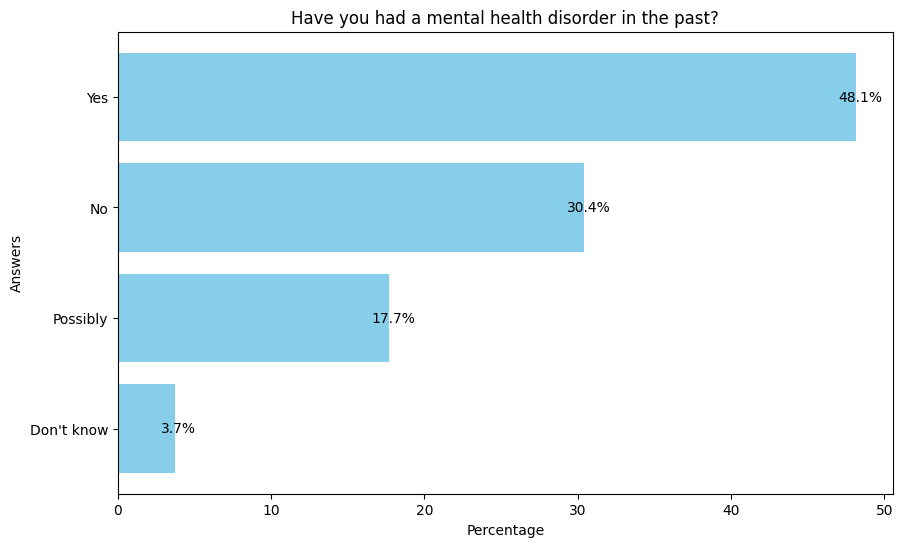

| AnswerText   |   Frequency |
|:-------------|------------:|
| Yes          |        1417 |
| No           |         896 |
| Possibly     |         521 |
| Don't know   |         109 |


In [19]:
query = """
SELECT
  CASE
    WHEN AnswerText IN ('Yes') THEN 'Yes'
    WHEN AnswerText IN ('No') THEN 'No'
    WHEN AnswerText IN ('Maybe', 'Possibly') THEN 'Possibly'
    WHEN AnswerText IN ('Don''t Know') THEN 'Don''t know'
    ELSE NULL
  END AS MappedAnswerText
FROM Answer
WHERE QuestionID = 32
AND AnswerText IS NOT NULL;
"""

q32 = pd.read_sql_query(query, conn)

statistics = q32['MappedAnswerText'].value_counts()

percentage = q32['MappedAnswerText'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
bars = plt.barh(statistics.index, percentage, color='skyblue')
plt.xlabel('Percentage')
plt.ylabel('Answers')
plt.title('Have you had a mental health disorder in the past?')
plt.gca().invert_yaxis()

for bar in bars:
    plt.annotate(f'{bar.get_width():.1f}%',
                 xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                 xytext=(3, 0),  # 3 points horizontal offset
                 textcoords="offset points",
                 ha='center', va='center')

plt.show()

formatted_statistics = statistics.reset_index()
formatted_statistics.columns = ['AnswerText', 'Frequency']
print(formatted_statistics.to_markdown(index=False))


48% of participants had a mental health problem in the past.

## Statistics: Do you currently have a mental health disorder?

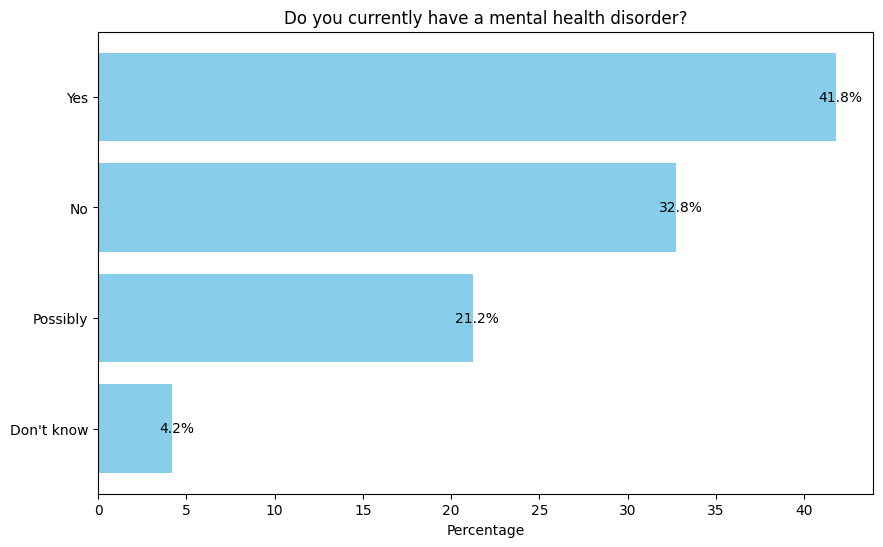

| MappedAnswerText   |   Frequency |
|:-------------------|------------:|
| Yes                |        1237 |
| No                 |         969 |
| Possibly           |         628 |
| Don't know         |         124 |


In [20]:
query = """
SELECT
  CASE
    WHEN AnswerText = 'Yes' THEN 'Yes'
    WHEN AnswerText = 'No' THEN 'No'
    WHEN AnswerText IN ('Maybe', 'Possibly') THEN 'Possibly'
    WHEN AnswerText = 'Don''t Know' THEN 'Don''t know'
    ELSE NULL
  END AS MappedAnswerText
FROM Answer
WHERE QuestionID = 33
AND AnswerText IS NOT NULL;
"""

q33 = pd.read_sql_query(query, conn)

statistics = q33['MappedAnswerText'].value_counts()

percentage = q33['MappedAnswerText'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
bars = plt.barh(statistics.index, percentage, color='skyblue')
plt.xlabel('Percentage')
plt.title('Do you currently have a mental health disorder?')
plt.gca().invert_yaxis()


for bar in bars:
    plt.annotate(f'{bar.get_width():.1f}%',
                 xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                 xytext=(3, 0),
                 textcoords="offset points",
                 ha='center', va='center')

plt.show()

formatted_statistics = statistics.reset_index()
formatted_statistics.columns = ['MappedAnswerText', 'Frequency']
print(formatted_statistics.to_markdown(index=False))


Nearly 42% of participants have a mental health problem.

## Cleaning and statistics: Do you believe your productivity is ever affected by a mental health issue?

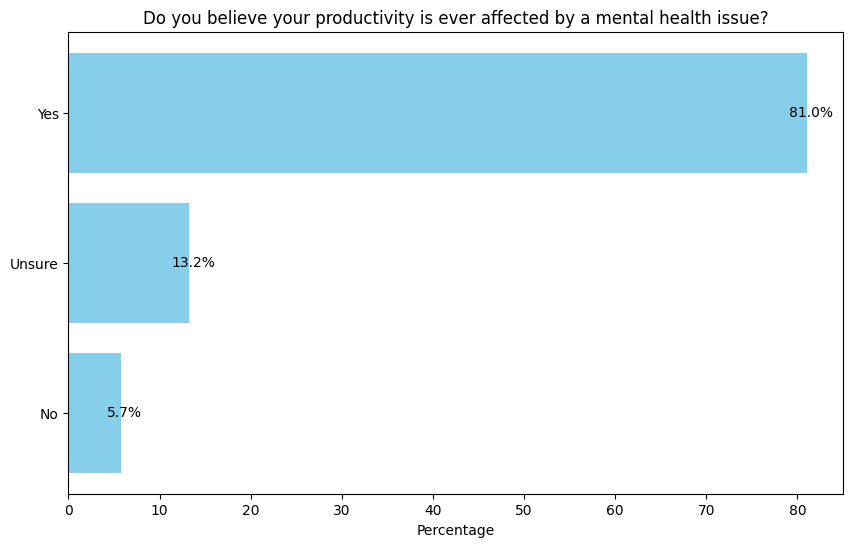

| AnswerText   |   Frequency |
|:-------------|------------:|
| Yes          |         367 |
| Unsure       |          60 |
| No           |          26 |


In [21]:
query = """
SELECT AnswerText
FROM Answer
WHERE QuestionID = 54
AND AnswerText IN ('Yes', 'No', 'Unsure');
"""

q54 = pd.read_sql_query(query, conn)

statistics = q54['AnswerText'].value_counts()

percentage = q54['AnswerText'].value_counts(normalize=True) * 100

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.barh(statistics.index, percentage, color='skyblue')
plt.xlabel('Percentage')
plt.title('Do you believe your productivity is'
          'ever affected by a mental health issue?')
plt.gca().invert_yaxis()

for bar in bars:
    plt.annotate(f'{bar.get_width():.1f}%',
                 xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                 xytext=(3, 0),  # 3 points horizontal offset
                 textcoords="offset points",
                 ha='center', va='center')

plt.show()

formatted_statistics = statistics.reset_index()
formatted_statistics.columns = ['AnswerText', 'Frequency']
print(formatted_statistics.to_markdown(index=False))


It is evident that mental health problems severly affect the productivity of participants.

# Distribution of Mental Illness by Gender

Which gender has more mental health problems?

In [22]:
query = """
    SELECT
        a1.UserID,
        CASE
            WHEN a1.AnswerText IN ('Male', 'Female') THEN a1.AnswerText
            ELSE 'Other'
        END AS Gender,
        CASE
            WHEN a2.AnswerText IN ('Yes', 'No') THEN a2.AnswerText
            ELSE 'Don''t Know'
        END AS MentalHealthDisorder
    FROM Answer a1
    JOIN Answer a2 ON a1.UserID = a2.UserID AND a1.SurveyID = a2.SurveyID
    WHERE a1.QuestionID = 2 AND a2.QuestionID = 33
"""

mhgender = pd.read_sql_query(query, conn)

mhgender.head(20000)

UserID  Gender MentalHealthDisorder
0       1261    Male                   No
1       1262    Male                  Yes
2       1263    Male                   No
3       1264    Male                  Yes
4       1265  Female                  Yes
...      ...     ...                  ...
2953    4214   Other           Don't Know
2954    4215    Male                   No
2955    4216    Male                   No
2956    4217   Other           Don't Know
2957    4218  Female                  Yes

[2958 rows x 3 columns]

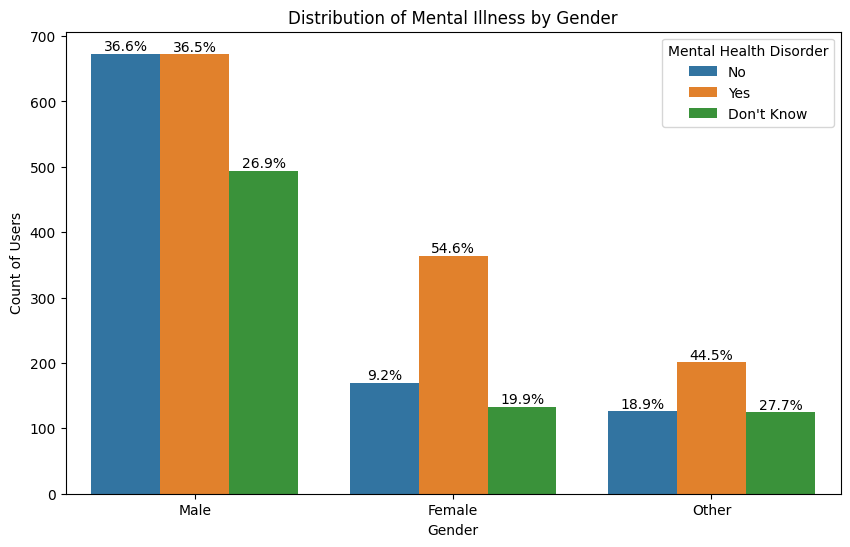


Count of Users by Gender:
Male: 1839
Female: 667
Other: 452
MentalHealthDisorder  Don't Know   No  Yes
Gender                                    
Female                       133  170  364
Male                         494  673  672
Other                        125  126  201


In [31]:
# Calculate the total count of users by gender
gender_counts = mhgender['Gender'].value_counts().to_dict()

# Create a countplot for mental illness distribution by gender
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Gender', hue='MentalHealthDisorder', data=mhgender)

# Get unique values for genders and disorders
unique_genders = mhgender['Gender'].unique()
unique_disorders = mhgender['MentalHealthDisorder'].unique()

# Initialize dictionary for total counts per gender
gender_totals = {
    gender: mhgender[mhgender['Gender'] == gender]['UserID'].nunique()
    for gender in unique_genders
}

# Annotate percentages on each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        x_index = int(p.get_x() + p.get_width() / 2.)
        gender = unique_genders[x_index]
        percentage = (height / gender_totals[gender]) * 100
        ax.annotate(f'{percentage:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10)

plt.title('Distribution of Mental Illness by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Users')
plt.legend(title='Mental Health Disorder', loc='upper right')
plt.show()

print("\nCount of Users by Gender:")
for gender, count in gender_totals.items():
    print(f"{gender}: {count}")

# Group by gender and disorder, then reset index
mh_counts = mhgender.groupby(['Gender', 'MentalHealthDisorder']).size()
mh_counts = mh_counts.reset_index(name='Count')

# Create pivot table for counts
pivot_table = mh_counts.pivot_table(
    index='Gender',
    columns='MentalHealthDisorder',
    values='Count',
    fill_value=0
)

print(pivot_table)

We can see that women and other genders are more likely to be affected by mental health issues than men.

# Survey Participation by Country

In [24]:
surveys_df = pd.read_sql_query("SELECT * FROM Survey", conn)
survey_years = list(surveys_df["SurveyID"])

country_df = df.query("QuestionID == 3")[["SurveyID", "AnswerText"]]

# Initialize a dictionary to store country data
country_dict = {}

# Iterate over each survey year
for year in survey_years:
    # Filter the DataFrame by the current year
    year_country_df = country_df[country_df.SurveyID == year]
    value_counts = year_country_df.value_counts()
    temp_dict = {}

    # Iterate over each country's value counts
    for country_name, country_no in zip(value_counts.index, value_counts):
        country_name = country_name[1]

        # Consolidate USA entries
        if country_name in ("United States", "United States of America"):
            temp_dict["USA"] = int(country_no)
        else:
            temp_dict[country_name] = int(country_no)

    # Add the temporary dictionary to the main dictionary
    country_dict[year] = temp_dict

# Convert the dictionary to a DataFrame
country_df = pd.DataFrame(country_dict).fillna(0).astype(int)

display(country_df)

2014  2016  2017  2018  2019
USA              751   840   497   312   204
United Kingdom   185   180    66    19    32
Canada            72    78    26     8    15
Germany           45    58    22     7     4
Netherlands       27    48    14     5     4
...              ...   ...   ...   ...   ...
Mauritius          0     0     0     1     0
Macedonia          0     0     0     1     0
Hong Kong          0     0     0     1     1
Ethiopia           0     0     0     1     0
Ghana              0     0     0     0     1

[80 rows x 5 columns]

In [45]:
# Loop through each column in the country_df DataFrame
for column in country_df.columns:

    # Sort the data in descending order
    count_df = country_df[column].sort_values(ascending=False)

    # Sum the values after the top 5 for 'Others'
    count_df_others_sum = count_df[6:].sum()

    # Create a temp DataFrame with the top 5 countries
    temp_df = count_df.head(5)

    # Add 'Others' row with the sum of the rest
    temp_df.loc["Others"] = count_df_others_sum

    # Pie chart with Plotly Express
    fig = px.pie(
        temp_df,
        values=column,
        names=temp_df.index,
        title=f"Top 6 countries in {column}",
        labels={"index": "Country"}
    )

    # Update trace for text position and info
    fig.update_traces(textposition='inside', textinfo='percent+label')


    fig.update_layout(
        template="plotly_white",
        width=900,
        height=700
    )

    fig.show()


Most of the participants live in USA.

# Corporate Employment and Mental Health

Are corporate employees at a higher risk of experiencing mental health problems?


In [29]:
# Query and set index for employment data
employment_df = df.query("QuestionID == 5")[["AnswerText", "UserID"]]
employment_df.set_index('UserID', inplace=True)
employment_df = employment_df[employment_df['AnswerText'] != '-1']

# Query and set index for diagnosed data
diagnosed_df = df.query("QuestionID == 34")[["AnswerText", "UserID"]]
diagnosed_df.set_index('UserID', inplace=True)
diagnosed_df = diagnosed_df[diagnosed_df['AnswerText'] != '-1']

# Print counts for employment and diagnosed status
print(
    f"How many total people work in an enterprise: "
    f"{employment_df.value_counts()[0]}\n"
    f"How many total people are self employed: "
    f"{employment_df.value_counts()[1]}\n"
    f"No. of people diagnosed with a mental health illness: "
    f"{diagnosed_df.value_counts()[0]}\n"
    f"No. of people NOT diagnosed with a mental health illness: "
    f"{diagnosed_df.value_counts()[1]}"
)

# Join employment with diagnosed and group by on employment
emp_diag_join = employment_df.join(
    diagnosed_df, on="UserID", how="inner",
    lsuffix="_employment", rsuffix='_diagnosed'
)

# Drop the index
emp_diag_join.reset_index(drop=True, inplace=True)

# Assign value counts to variables
corp_diag = emp_diag_join.value_counts()[0]
corp_notdiag = emp_diag_join.value_counts()[1]
self_diag = emp_diag_join.value_counts()[2]
self_notdiag = emp_diag_join.value_counts()[3]

# Create a DataFrame with custom data
data = pd.DataFrame({
    "Employment": ["Corporate", "Self employed"],
    "Diagnosed": [corp_diag, self_diag],
    "Not Diagnosed": [corp_notdiag, self_notdiag]
})

# Create the bar figure
fig = px.bar(
    data, x="Employment", y=["Diagnosed", "Not Diagnosed"],
    labels={"variable": "Status", "value": "No. of people"},
    template="plotly_white",
    title="Does working in a corporate cause more mental health issues?"
)

fig.show()


How many total people work in an enterprise: 3550
How many total people are self employed: 650
No. of people diagnosed with a mental health illness: 1363
No. of people NOT diagnosed with a mental health illness: 732


The data reveals that the number of individuals diagnosed with a mental health condition is nearly twice as high as those without a diagnosis. This significant discrepancy highlights the prevalence of mental health issues within the surveyed group

### Correlation Between Enterprise Employment and Mental Health Diagnoses

Is there a potential relationship between employment at an enterprise and the incidence of mental health diagnoses?

In [32]:
# Rename the columns
emp_diag_join = emp_diag_join.rename(
    columns={
        'AnswerText_employment': 'Corporate',
        'AnswerText_diagnosed': 'Diagnosed'
    }
)

# Create the imshow plot with the renamed columns
fig = px.imshow(
    emp_diag_join.apply(lambda x: pd.factorize(x)[0]).corr(
        method='pearson', min_periods=1
    )
)

# Update the color scale title
fig.update_layout(title='Correlation Matrix:'
                        'Mental Health and Employment',
                  coloraxis_colorbar_title='corr. factor')

# Update the hovertemplate to change 'color' to 'corr. factor'
fig.update_traces(
    hovertemplate='x: %{x}<br>y: %{y}<br>corr. factor: %{z}'
)

fig.show()


 According to the data set, no correlation exists.

# Conclusion

- The exploration of the tech industry and its intersection with mental health reveals a complex landscape. While the industry is often idealized, the reality is a high-pressure environment that can exacerbate mental health issues. The data underscores the prevalence of these issues within the industry, with a significant proportion of tech professionals diagnosed with mental health conditions.

- The gender disparities in tech and STEM fields persist, despite efforts to encourage female participation. The analysis of survey data shows a stubborn imbalance in gender representation, with a majority of participants being male. But females are more prone to mental health problems.

- The examination of survey participation trends, participant ages, and participation by country provides a comprehensive overview of the demographics of the tech industry. However, the data also highlights the challenges in deriving meaningful insights due to unclean data and the need for end-user validation.

- The analysis of treatment-seeking behavior in the tech industry reveals a reluctance to seek help (only 57% of participants seek treatment), often exacerbated by societal stigma. However, there has been a marked increase in the usage of mental health services among individuals with prevalent mental health issues.

- The exploration of corporate employment and mental health diagnoses shows a higher prevalence of diagnosed mental health conditions among those employed by enterprises. However, the correlation analysis indicates no significant relationship between enterprise employment and the incidence of mental health diagnoses.

In conclusion, this comprehensive analysis provides valuable insights into the realities of the tech industry, highlighting the importance of mental health awareness, the need for discussing more openly, and the challenges in data analysis. It underscores the need for continued efforts to address these issues and create a more inclusive and supportive environment in the tech industry.

# Suggestions on the improvement of the analysis

- Data Validation: The analysis mentions instances of unclean data, such as improbable ages. Implementing stricter data validation measures during the data collection process can help ensure the reliability of the data.

- Detailed Demographics: The analysis could benefit from a more detailed breakdown of demographics. For instance, age and gender distributions within each employment type (corporate or self-employed) could provide more nuanced insights.

- Longitudinal Analysis: The analysis mentions fluctuations in survey participation over the years. A longitudinal analysis, tracking the same participants over time, could help distinguish between real changes and artifacts of different population samples.

- Correlation vs Causation: The analysis finds no correlation between enterprise employment and incidence of mental health diagnoses. However, it's important to remember that correlation does not imply causation. Even if a correlation were found, it would not necessarily mean that one factor causes the other.

- Expand Scope: The analysis focuses on the tech industry. Expanding the scope to include other industries could provide a more comprehensive view of mental health in the workplace.

- Qualitative Data: The analysis is largely quantitative. Incorporating qualitative data, such as interviews or open-ended survey responses, could provide additional context and insights.

- Mental Health Resources: Given the high prevalence of mental health issues found in the analysis, it could be beneficial to provide information on mental health resources, such as counseling services or hotlines, as part of the discussion.

- Further Research: The analysis could suggest areas for further research. For example, exploring why certain demographics are more likely to seek treatment or how workplace policies impact mental health.